# ■ Introduction
      예측 애널리틱스 실습 소개
      
  ###   ※ 목표:Support Vector Machines (SVM) 모델 구축
   ### 1. Toy examples을 통해 각 SVM margin 시각화
         Linear SVM
          -Soft margin
          -Hard margin
          Nonlinear SVM (kernel functions)
         -Soft margin      -Polynomianl kernnel
      -Hard margin      -Sigmoid kernel
                            -Gaussian kernel
          
    Binary classification, Multi-class classification
       
       
  ###     2. SVM 모델 구축 
          K-fold cross validation 활용
          
  ###     3. 예측 결과 평가 
       
 

### 1. 모듈불러오기

In [1]:
from IPython.display import display, HTML
import warnings
warnings.filterwarnings(action='ignore')

# 실습용 데이터 패키지
from sklearn.datasets import load_iris, make_moons, load_breast_cancer

import os

# 데이터 전처리
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# 기계학습 모델 및 평가
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import plot_confusion_matrix, classification_report

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
matplotlib.rcParams['axes.unicode_minus'] = False

#한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

### 2. Toy examples

# ■ Support vector Machines
       Binary and Multi-class classification
       

#### 2.1 Binary classification

##### [ iris dataset]

##### Linear SVM for linearly separable cases

In [2]:
# iris데이터의 2개 class(Iris-setosa, Iris-Versicolor)에 대해 고려해보자
iris = load_iris()
X = iris['data'][:,(2,3)]

scaler = StandardScaler()
Xstan = scaler.fit_transform(X)

data = pd.DataFrame(data=Xstan, columns=['petal length','petal width'])
data['target'] = iris['target']
data = data[data['target']!=2] # Iris=setosa 와 Iris-Versicolor 에 대해 고려해보자
data.head()

,petal length,petal width,target
0,-1.340227,-1.315444,0
1,-1.340227,-1.315444,0
2,-1.397064,-1.315444,0
3,-1.283389,-1.315444,0
4,-1.340227,-1.315444,0


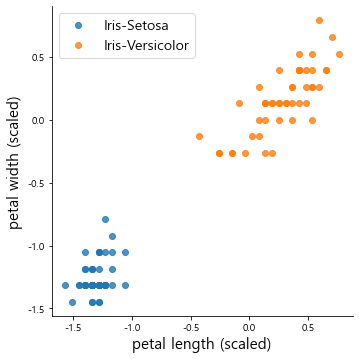

In [3]:
sns.lmplot(x='petal length' , y='petal width', hue='target', data=data, fit_reg=False, legend=False)
plt.legend(['Iris-Setosa', 'Iris-Versicolor'], fontsize = 14)
plt.xlabel('petal length (scaled)', fontsize = 15)
plt.ylabel('petal width (scaled)', fontsize = 15)
plt.show()

##### Linear SVM for linearly separable cases with hard margin (Large C)
 
  * Decision variable은 w,b,ξ
  * Slack variable ξ ≥0 도입하여 training error 허용 → 그렇다고 마냥 크게 할 수 없음
  * Objective function에 penaly를 추가하여 억제
  * C는 margin과 training error에 대한 trade-off를 결정하는 tuning parameter
       C↑ : training error에 더 큰 비중 = overfit(error를 많이 허용하지 않음)
       C↓ : margin에 더 큰 비중 = underfit (error 많이 허용)
  * Training data가 linearly separable하지 않아도 해가 존재함
       

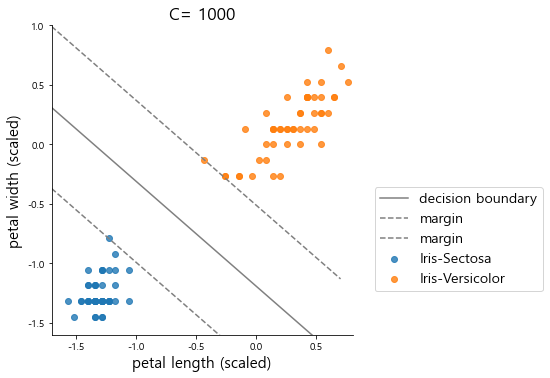

In [4]:
# Linear Hard

C = 1000
svc = LinearSVC(C=C, loss = 'hinge')
svc.fit(data[['petal length','petal width']].values,data['target'].values)

# 파라미터 (W, b) 도출하기
w0,w1 =svc.coef_[0]
b = svc.intercept_[0]

x0 = np.linspace(-1.7, 0.7, num=100)
# 결정 경계 (decision boundary) 도출하기
x1_decision = -b/w1 - w0/w1*x0

# +1 margin
x1_plus = x1_decision + 1/w1
# -1 margin
x1_minus = x1_decision -1/w1

sns.lmplot(x='petal length', y='petal width',hue='target',data=data, fit_reg=False, legend=False)
plt.plot(x0,x1_decision, color='grey')
plt.plot(x0,x1_plus, x0,x1_minus, color='grey', linestyle='--')
plt.legend(['decision boundary', 'margin', 'margin','Iris-Sectosa', 'Iris-Versicolor'], fontsize = 14, bbox_to_anchor =(1.05,0.5))
plt.xlabel('petal length (scaled)', fontsize = 15)
plt.ylabel('petal width (scaled)', fontsize = 15)
plt.title(f'C= {C}', fontsize = 17)
plt.ylim(-1.6,1)
plt.xlim(-1.7,0.8)
plt.show()

##### [moons dataset]

##### Linear SVM for linearly nonseparable cases

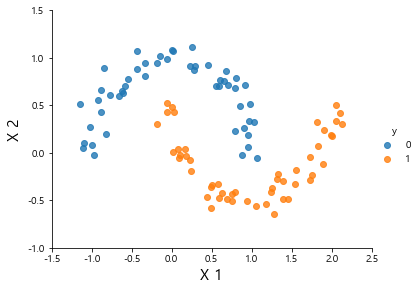

In [5]:
X, y =make_moons(noise=0.1, random_state=2) # fix random_state to make sure it produces the same dataset everytime. Remove it if you want
data = pd.DataFrame(data = X, columns=['x1','x2'])
data['y']=y
data.head()

sns.lmplot(x='x1',y='x2',hue='y', data=data, fit_reg=False , legend=True, size=4, aspect=4/3)
plt.xlim(-1.5,2.5)
plt.ylim(-1,1.5)
plt.xlabel('X 1', fontsize = 15)
plt.ylabel('X 2', fontsize = 15)
plt.show()

##### Linear SVM for linearly nonseparable cases with hard margin (Large C)

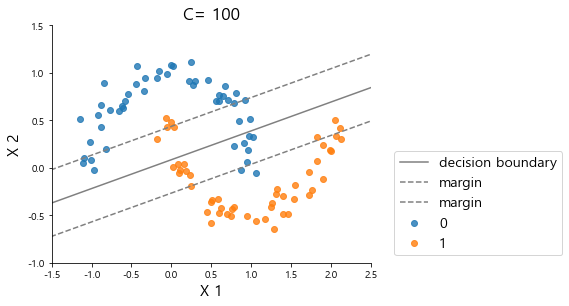

In [6]:
# Linear Hard

C=100
svc = LinearSVC(C=C,loss='hinge')
svc.fit(data[['x1','x2']].values,data['y'].values)

# 파라미터 (W, b) 도출하기
w0,w1 = svc.coef_[0]
b = svc.intercept_[0]

# x0 = np.linspace(-1.7, 0.7, num=100)
x0 = np.linspace(-1.7, 2.7, num=100)
# 결정 경계 (decision boundary) 도출하기
x1_decision = -b/w1 - w0/w1*x0

# +1 margin
x1_plus = x1_decision + 1/w1
# -1 margin
x1_minus = x1_decision - 1/w1

sns.lmplot(x='x1',y='x2',hue='y', data=data, fit_reg=False , legend=False, size=4, aspect=4/3)
plt.xlim(-1.5,2.5)
plt.ylim(-1,1.5)
plt.plot(x0,x1_decision, color='grey')
plt.plot(x0,x1_plus,x0,x1_minus,color='grey', linestyle='--')
plt.legend(['decision boundary', 'margin', 'margin','0','1'], fontsize = 14, bbox_to_anchor =(1.05,0.5))
plt.xlabel('X 1', fontsize = 15)
plt.ylabel('X 2', fontsize = 15)
plt.title(f'C= {C}', fontsize = 17)
#plt.ylim(-1.6,1)
#plt.xlim(-1.7,0.8)
plt.show()

# ■ Support Vector Machines
       Visualization
       
##### -Polynominal kernel

##### degree 3

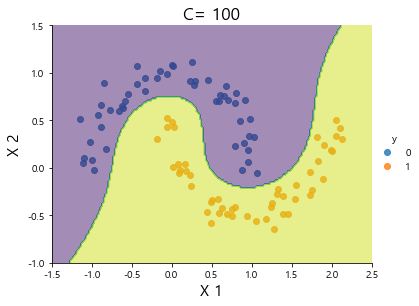

In [7]:
C= 100
scaler = StandardScaler()
Xstan = scaler.fit_transform(X)
svm_clf = SVC(kernel='poly', degree=3,C=C, coef0=1)
svm_clf.fit(Xstan,y)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# create grids
X0 , X1 = X[:,0], X[:,1]
xx0, xx1 = make_meshgrid(X0, X1)
#standardization on th grids
xgrid = np.c_[xx0.ravel(), xx1.ravel()]
xgridstan = scaler.transform(xgrid)

# prediction
Z = svm_clf.predict(xgridstan)
Z = Z.reshape(xx0.shape)

# plotting prediction contours - decision boundary (Z=0), and two margins (Z = 1 or -1)
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, size=4, aspect=4/3)
plt.contourf(xx0, xx1, Z, alpha=0.5)
plt.xlim(-1.5,2.5)
plt.ylim(-1,1.5)
plt.xlabel('X 1', fontsize = 15)
plt.ylabel('X 2', fontsize = 15)
plt.title(f'C= {C}', fontsize = 17)
plt.show()

##### - Gaussia kernel (RBF kernel)
##### Small gamma

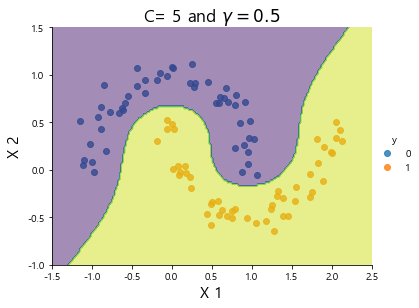

In [8]:
C= 5
gamma = 0.5
scaler = StandardScaler()
Xstan = scaler.fit_transform(X)
svm_clf = SVC(kernel='rbf', gamma=gamma,C=C)
svm_clf.fit(Xstan,y)

# create grids
X0, X1 = X[:,0], X[:,1]
xx0, xx1 = make_meshgrid(X0, X1)
# standardization on the grids
xgrid = np.c_[xx0.ravel(), xx1.ravel()]
xgridstan = scaler.transform(xgrid)

# prediction
Z = svm_clf.predict(xgridstan)
Z = Z.reshape(xx0.shape)

# plotting prediction contours - decision boundary (Z=0), and two margins (Z = 1 or -1)
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, size=4, aspect=4/3)
plt.contourf(xx0, xx1, Z, alpha=0.5)
plt.xlim(-1.5,2.5)
plt.ylim(-1,1.5)
plt.xlabel('X 1', fontsize = 15)
plt.ylabel('X 2', fontsize = 15)
plt.title(f'C= {C} and $\gamma={gamma}$', fontsize = 17)
plt.show()

##### Large gamma

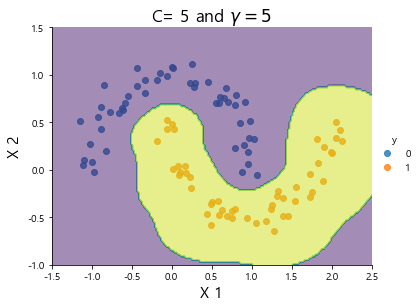

In [9]:
C= 5
gamma = 5
scaler = StandardScaler()
Xstan = scaler.fit_transform(X)
svm_clf = SVC(kernel='rbf', gamma=gamma,C=C)
svm_clf.fit(Xstan,y)

# create grids
X0, X1 = X[:,0], X[:,1]
xx0, xx1 = make_meshgrid(X0, X1)
# standardization on the grids
xgrid = np.c_[xx0.ravel(), xx1.ravel()]
xgridstan = scaler.transform(xgrid)

# prediction
Z = svm_clf.predict(xgridstan)
Z = Z.reshape(xx0.shape)

# plotting prediction contours - decision boundary (Z=0), and two margins (Z = 1 or -1)
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, size=4, aspect=4/3)
plt.contourf(xx0, xx1, Z, alpha=0.5)
plt.xlim(-1.5,2.5)
plt.ylim(-1,1.5)
plt.xlabel('X 1', fontsize = 15)
plt.ylabel('X 2', fontsize = 15)
plt.title(f'C= {C} and $\gamma={gamma}$', fontsize = 17)
plt.show()

##### -Sigmoid kernel

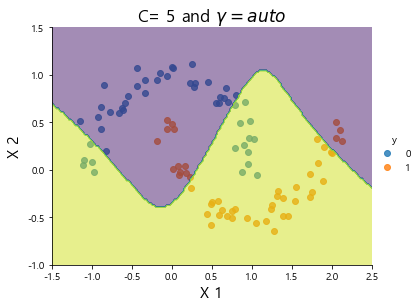

In [10]:
C= 5
gamma = 'auto'
scaler = StandardScaler()
Xstan = scaler.fit_transform(X)
svm_clf = SVC(kernel='sigmoid', gamma=gamma,C=C)
svm_clf.fit(Xstan,y)

# create grids
X0, X1 = X[:,0], X[:,1]
xx0, xx1 = make_meshgrid(X0, X1)
# standardization on the grids
xgrid = np.c_[xx0.ravel(), xx1.ravel()]
xgridstan = scaler.transform(xgrid)

# prediction
Z = svm_clf.predict(xgridstan)
Z = Z.reshape(xx0.shape)

# plotting prediction contours - decision boundary (Z=0), and two margins (Z = 1 or -1)
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, size=4, aspect=4/3)
plt.contourf(xx0, xx1, Z, alpha=0.5)
plt.xlim(-1.5,2.5)
plt.ylim(-1,1.5)
plt.xlabel('X 1', fontsize = 15)
plt.ylabel('X 2', fontsize = 15)
plt.title(f'C= {C} and $\gamma={gamma}$', fontsize = 17)
plt.show()

#### 2.2 Multi-class classification
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

       

# ■ Support vector Machines
      One- vs. -rest

In [11]:
iris = load_iris()
X = iris['data'][:,(2,3)]

scaler = StandardScaler()
Xstan = scaler.fit_transform(X)

data = pd.DataFrame(data=Xstan, columns=['petal length','petal width'])
data['target'] = iris['target']
data.head()

X = iris.data[:, :2]
y = iris.target

In [12]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


In [13]:
# 모델 정의&피팅
C= 1.0 # regularization parameter
models = (SVC(kernel='linear', C=C),
          SVC(kernel='rbf', gamma=0.7, C=C),
          SVC(kernel='poly', degree=3 ,gamma='auto', C=C),
          SVC(kernel='sigmoid', C=C))
models = (clf.fit(X,y) for clf in models)

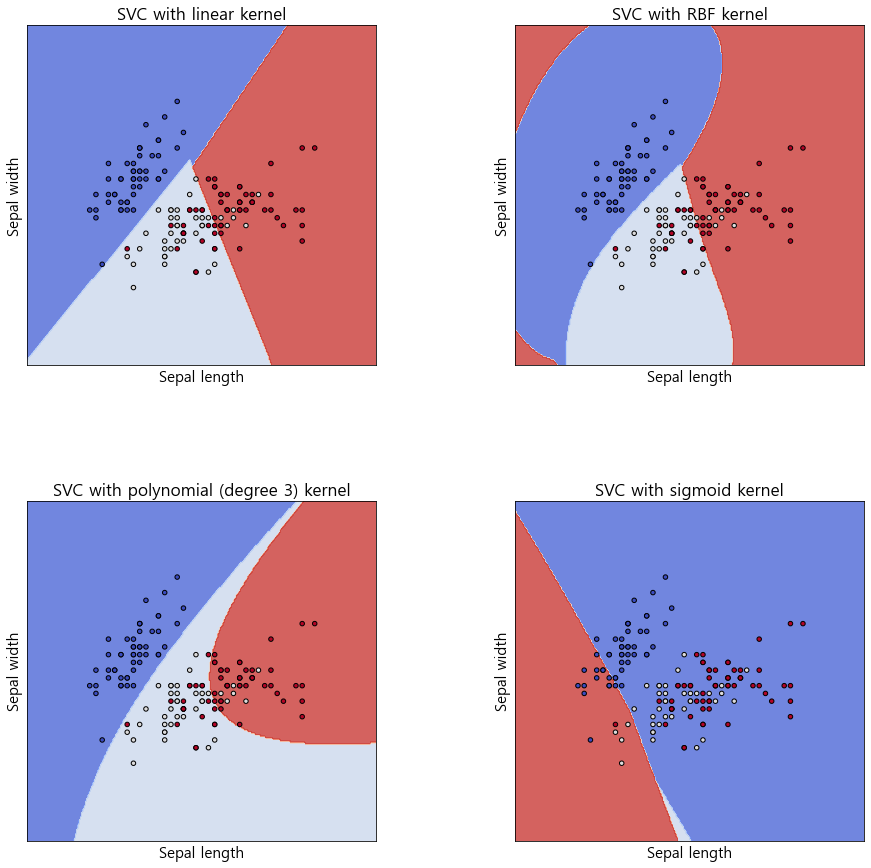

In [14]:
# plot title 형성
titles = ('SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with sigmoid kernel')

# plot 그리기

fig, sub = plt.subplots(2, 2,figsize=(15,15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:,0], X[:,1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                 cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length', fontsize=15)
    ax.set_ylabel('Sepal width', fontsize=15)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title, fontsize= 17)
    
plt.show()

### 3. 데이터 불러오기: Breast Cancer
데이터 구조
  * 데이터:위스콘신 대학교에서 제공한 유방암 진단결과
  * 관측치 개수:569개
  * 변수 개수: 32개(ID,진단결과,30개의 실측변수 값)

설명 변수(원인: 예측값을 설명할 수 있는 변수
  * id: 환자 식별 번호
  * radius: 반경(중심에서 외벽까지 거리들의 평균값)
  * texture: 질감(Gray-Scale값들의 표준편차)
  * perimeter: 둘레
  * area: 면적
  * smoothness: 매끄러움(반경길이의 국소적 변화)
  * compactness: 조그만 정도(둘레^2/면적-1)
  * concavity: 오목함(윤곽의 오목한 부분의 정도)
  * points: 오목한 점의 수
  * symmetry: 대칭
  * dimension: 프랙탈 차원(해안선 근사-1)
  * mean:3~12번 까지는 평균값을 의미
  * se:13~22번 까지는 표준 오차를 의미
  * worst:23~32는 각 세포별 구분들에서 제일 큰 3개의 값을 평균낸 값
  
#### 반응 변수(결과: 예측하고자 하는 값)
  * diagnosis:양성여부(Maligant=1 악성(유방암),Benign=0 양성(단순낭종))

In [15]:
# 데이터셋 로드 및 설명
breast_cancer = load_breast_cancer()
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [16]:
breast_cancer.data.shape

(569, 30)

### 3.1 탐색적 데이터 분석 및 데이터 전처리
#### X: 독립변수, 예측변수,입력변수
#### y: 종속변수,반응변수,출력변수

In [20]:
# 데이터 프레임 형태로 변환
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.DataFrame(breast_cancer.target, columns=['diagnosis'])

In [21]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
X.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [23]:
y.tail()

,diagnosis
564,0
565,0
566,0
567,0
568,1


In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [25]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [26]:
y['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

#### Train/Test 데이터 분리
 * Training 데이터 70% / Testing 데이터 30% 나누기

In [28]:
# Train set / Test set 나누기
X_train, X_test, y_train, y_test =train_test_split(X,y,stratify=y, test_size=0.3,random_state=2021)

# 데이터 컬럼 단위 정규화하기
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

print(f'Train set dimension is {X_train.shape}')
print(f'Test set dimension is {X_test.shape}')

Train set dimension is (398, 30)
Test set dimension is (171, 30)


#### 3.4 모델링
 * 하이퍼파라미터 결정

In [29]:
svc =SVC(random_state=2021)
param_grid = [{'kernel':['linear'], 'C':[0.1, 1, 10, 100, 1000]},
             {'kernel':['poly'], 'degree':[2,3,5], 'C': [0.1, 1, 10, 100, 1000]},
             {'kernel':['rbf'], 'gamma':['auto', 'scale'], 'C': [0.1, 1, 10, 100, 1000]},
             {'kernel':['sigmoid'], 'gamma': ['auto', 'scale'], 'C': [0.1, 1, 10, 100, 1000]}]

scores = ['precision', 'recall']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    
    CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, scoring= f'{score}_macro', cv=10, verbose=1 ,n_jobs=12 )
    CV_svc.fit(X_train, y_train)
    
    print("Best parameters set fount on development set:")
    print()
    print(CV_svc.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = CV_svc.cv_results_['mean_test_score']
    stds = CV_svc.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, CV_svc.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std*2, params))
    print()
    
    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, CV_svc.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    
CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=10 , verbose=1, n_jobs=12)
CV_svc.fit(X_train, y_train)

# Tuning hyper-parameters for precision

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Best parameters set fount on development set:

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

Grid scores on development set:

0.964 (+/-0.040) for {'C': 0.1, 'kernel': 'linear'}
0.965 (+/-0.038) for {'C': 1, 'kernel': 'linear'}
0.968 (+/-0.046) for {'C': 10, 'kernel': 'linear'}
0.951 (+/-0.065) for {'C': 100, 'kernel': 'linear'}
0.934 (+/-0.069) for {'C': 1000, 'kernel': 'linear'}
0.849 (+/-0.025) for {'C': 0.1, 'degree': 2, 'kernel': 'poly'}
0.894 (+/-0.048) for {'C': 0.1, 'degree': 3, 'kernel': 'poly'}
0.861 (+/-0.059) for {'C': 0.1, 'degree': 5, 'kernel': 'poly'}
0.850 (+/-0.108) for {'C': 1, 'degree': 2, 'kernel': 'poly'}
0.926 (+/-0.046) for {'C': 1, 'degree': 3, 'kernel': 'poly'}
0.881 (+/-0.070) for {'C': 1, 'degree': 5, 'kernel': 'poly'}
0.847 (+/-0.144) for {'C': 10, 'degree': 2, 'kernel': 'poly'}
0.955 (+/-0.052) for {'C': 10, 'degree': 3, 'kernel': 'poly'}
0.916 (+/-0.056) 

GridSearchCV(cv=10, estimator=SVC(random_state=2021), n_jobs=12,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3, 5],
                          'kernel': ['poly']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': ['auto', 'scale'], 'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': ['auto', 'scale'], 'kernel': ['sigmoid']}],
             verbose=1)

In [30]:
best_svc = CV_svc.best_estimator_
best_svc.fit(X_train, y_train)

SVC(C=10, gamma='auto', random_state=2021)

In [31]:
# Train set에 대한 성능
y_pred = best_svc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred = y_pred)
print('Train set에 대한 성능')
print(f"정확도:{acc:0.4f}")

# Test set에 대한 성능
y_pred = best_svc.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print("Wn")
print("Test set에 대한 성능")
print(f"정확도:{acc:0.4f}")

Train set에 대한 성능
정확도:0.9925
Wn
Test set에 대한 성능
정확도:0.9825


In [32]:
recall = recall_score(y_true = y_test, y_pred =y_pred) ## 민감도
precision = precision_score(y_true = y_test, y_pred = y_pred) ## 정밀도

print(f"정확도:{acc:0.4f}",f"민감도:{recall:0.4f}",f"정밀도:{precision:0.4f}", sep = ' | ')

정확도:0.9825 | 민감도:0.9813 | 정밀도:0.9906


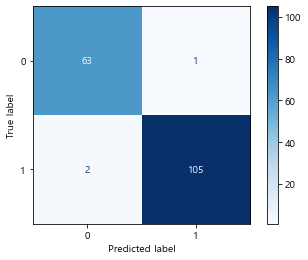

In [33]:
plot_confusion_matrix(best_svc, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


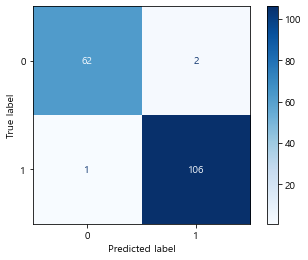

In [36]:
rfc = RandomForestClassifier(random_state=2021)
param_grid = {
    'n_estimators' : [50, 60, 70],
    'max_depth' : [10,15,20],
    'max_leaf_nodes' : [50, 100, 200],
    'criterion' : ['gini', 'entropy'],
    'max_features' : ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10, verbose=1, n_jobs=12)
CV_rfc.fit(X_train,y_train)

best_rfc = CV_rfc.best_estimator_
best_rfc.fit(X_train, y_train)

plot_confusion_matrix(best_rfc, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

### EOD